### include

In [16]:
# %config IPCompleter.greedy=True

In [1]:
import numpy as np
import matplotlib.pyplot as plt


### Lists

In [2]:
animals = ['cat', 'dog', 'fish','horse']
animals.append('bird')
print(animals)

['cat', 'dog', 'fish', 'horse', 'bird']


### Loop over the elements of a list

In [3]:
for animal in animals:
    print(animal)

cat
dog
fish
horse
bird


In [6]:
print(animals[1:])
print(animals[:-1])
print(animals[1:3]) # includes index 1, not includes index 3

['dog', 'fish', 'horse', 'bird']
['cat', 'dog', 'fish', 'horse']
['dog', 'fish']


### Generate n realization of a Gaussian random variable

In [7]:
n = 10
mu = 1
sigma = 2

In [8]:
samples = []
for i in range(n):
    x = sigma * np.random.randn() + mu
    samples.append(x)
print(samples)

[0.741270746750045, -0.16345454971495266, 5.418963215703399, 2.0401530794119607, 0.63988044047901, -2.3647501868829606, 2.4352165103042553, -0.6663968225178323, 3.272222650781213, -1.7004697491669578]


### List comprehension in Python

In [9]:
# [<expression> for <item> in <list> if <conditions>]
samples2 = [sigma * np.random.randn() + mu for _ in range(n)]
print(samples2)

[-1.3211434312756638, 0.7685504479966561, -0.16035409356286623, 0.45944599296240707, 2.179272740880302, -0.4939173377778028, -0.08035599618269895, -2.544698515688654, -2.0071971799745207, 1.4273923593571802]


### Dictionary

In [10]:
# A dictionary stores a list of (key, value) pairs
animal_legs = {'cat': 4, 'dog': 4, 'fish': 0, 'bird': 2, 'spider': 8}
print(animal_legs['dog'])


4


### Loop over dictionary

In [11]:
for k, v in animal_legs.items():
    print("A {} has {} legs.".format(k,v))


A cat has 4 legs.
A dog has 4 legs.
A fish has 0 legs.
A bird has 2 legs.
A spider has 8 legs.


### ints, floats, tuples, strings are immutables.
### lists, dictionaries are mutables.
### In Python, arguments of a function are passed by assignment which behave differently for immutables and mutables.

In [12]:
x = ['A', 'C', 'D'] # Lists are mutables

def change_list(the_list):
    print("The original list is:",the_list)
    the_list.append('E')
    print("In the funtion: It is changed to\n", the_list)
    
change_list(x)
print("Outside the function: It is changed to\n", x)

The original list is: ['A', 'C', 'D']
In the funtion: It is changed to
 ['A', 'C', 'D', 'E']
Outside the function: It is changed to
 ['A', 'C', 'D', 'E']


In [13]:
x = "This is a string." # Strings are immutables

def change_string(the_string):
    print("The original string is:",the_string)
    the_string = the_string + " ABCDE."
    print("In the funtion: It is changed to\n", the_string)
    
change_string(x)
print("Outside the funtion: It is changed to\n", x)

The original string is: This is a string.
In the funtion: It is changed to
 This is a string. ABCDE.
Outside the funtion: It is changed to
 This is a string.


### To avoid unwanted change on mutables, we use deep copy. 

In [14]:
x = [31, 13, 22]
x2 = x.copy()
x2.append(0)
print("x is {}.\nx2 is {}.".format(x,x2))

x3 = x
x3.append(0)
print("x is {}.\nx3 is {}.".format(x,x3))

x is [31, 13, 22].
x2 is [31, 13, 22, 0].
x is [31, 13, 22, 0].
x3 is [31, 13, 22, 0].


### Numerical Operations for Forward Propagation and Backward Propagation in MLPs

In [15]:
# For Matlab-like behaviors, we use numpy arrays
x = np.array([-2,1]) # Convert a list of numbers into a numpy array
A = np.array([[1,2],[3,4]])
b = np.array([-2,3])
print(x)
print(A)
print(b)

[-2  1]
[[1 2]
 [3 4]]
[-2  3]


### $y = Ax + b$

In [16]:
y = A @ x + b
print(y)

[-2  1]


### Compute $z = e^y + 1/y + y^3$  elementwise

In [17]:
z = np.exp(y) + 1/y + y**3
print(z)

[-8.36466472  4.71828183]


#### Save and load x1 and x2 in hdf5 format
##### Details: http://docs.h5py.org/en/stable/quick.html#quick

In [19]:
import h5py
# Save data in a hdf5 file
# create a file, in 'w' mode for writing
with h5py.File("testdata.hdf5", "w") as f:
    f.create_dataset("x", data=x)
    f.create_dataset("A", data=A)
# File handler f is automatically closed once we exit the block

In [20]:
import h5py
with h5py.File('testdata.hdf5', 'w') as f:
    f.create_dataset('x', data=x)
    f.create_dataset('A', data=A)

In [17]:
# Load data in a hdf5 file
with h5py.File("testdata.hdf5", "r") as f:
    print('Keys of the dataset dictionary: ', list(f.keys()))
    x_read = f['x']
    A_read = f['A']
    print('Data A_read: ', A_read)
    print('Data A_read: ', type(A_read)) #note: this is still a hdf5 dataset, not a numpy array
    print('Data A_read: ', A_read[:]) 

Keys of the dataset dictionary:  ['A', 'x']
Data A_read:  <HDF5 dataset "A": shape (2, 2), type "<i8">
Data A_read:  <class 'h5py._hl.dataset.Dataset'>
Data A_read:  [[1 2]
 [3 4]]


In [25]:
with h5py.File('testdata.hdf5', 'r') as f:
    f.keys()
    x_ = f['x']
    A_ = f['A']
    print(x_[:])
    

[-2  1]


#### Other useful features of h5py
1. Groups. The behave like python dictionaries. (http://docs.h5py.org/en/stable/high/group.html)
2. Arbitrary variable length data storage, useful for data like speech signal (http://docs.h5py.org/en/stable/special.html?highlight=variable%20length)
3. Resizable data storage. Useful for creating very big datasets. (http://docs.h5py.org/en/stable/high/dataset.html)

### NOTE: For HW1, problem 1, you have to use HDF5 format 

### Plotting a signal in Python $ x(t) = \sin(2\pi \times 0.05t)$

Text(0, 0.5, 'x(t)')

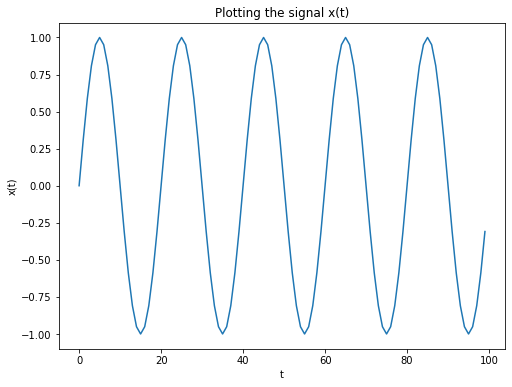

In [26]:
# Signal
t = np.linspace(0,999,1000)
x = np.sin(2*np.pi*0.05*t)

plt.figure(figsize = (8,6))
plt.plot(t[0:100],x[0:100])
plt.title('Plotting the signal x(t)')
plt.xlabel('t')
plt.ylabel('x(t)')

Text(0, 0.5, 'y(t)')

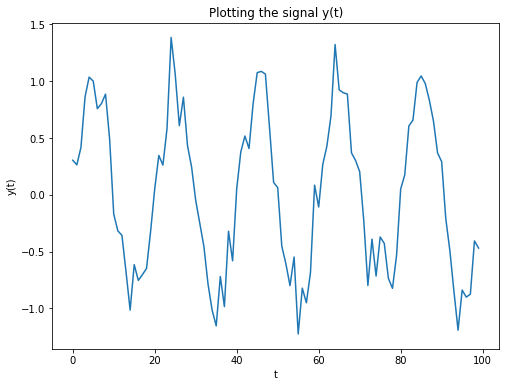

In [27]:
### Plotting the signal corrupted by a Gaussian noise
y = x + 0.2*np.random.randn(1000)

plt.figure(figsize = (8,6))
plt.plot(t[0:100],y[0:100])
plt.title('Plotting the signal y(t)')
plt.xlabel('t')
plt.ylabel('y(t)')

#### plot one 2D sample, useful to look deeper into DNN weights 

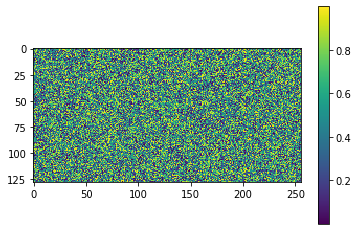

In [28]:
### Plotting a 2-D sample
A = np.random.rand(128,256) # Uniform [0,1] data

plt.figure()
plt.imshow(A)
plt.colorbar()
plt.show()

#### load an image and show

(620, 620, 3)


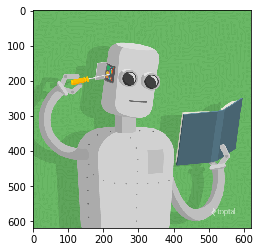

[[[0.4117647  0.7176471  0.39607844]
  [0.4117647  0.7176471  0.39607844]
  [0.4117647  0.7176471  0.39607844]
  ...
  [0.41568628 0.72156864 0.4       ]
  [0.41568628 0.72156864 0.4       ]
  [0.41568628 0.72156864 0.4       ]]

 [[0.41568628 0.72156864 0.4       ]
  [0.41568628 0.72156864 0.4       ]
  [0.41568628 0.72156864 0.4       ]
  ...
  [0.41568628 0.72156864 0.4       ]
  [0.41568628 0.72156864 0.4       ]
  [0.41568628 0.72156864 0.4       ]]

 [[0.41568628 0.72156864 0.4       ]
  [0.41568628 0.72156864 0.4       ]
  [0.41568628 0.72156864 0.4       ]
  ...
  [0.41568628 0.72156864 0.4       ]
  [0.41568628 0.72156864 0.4       ]
  [0.41568628 0.72156864 0.4       ]]

 ...

 [[0.41568628 0.72156864 0.4       ]
  [0.41568628 0.72156864 0.4       ]
  [0.4        0.7058824  0.38431373]
  ...
  [0.38431373 0.6901961  0.36862746]
  [0.38431373 0.6901961  0.36862746]
  [0.3882353  0.69411767 0.37254903]]

 [[0.41568628 0.72156864 0.4       ]
  [0.4117647  0.72156864 0.39607844]


In [29]:
import matplotlib.image as mpimg
img=mpimg.imread('image.png')
print(img.shape) # See dimensions and number of color channels in image
plt.imshow(img)
plt.show()
print(img) ## See actual values of the image

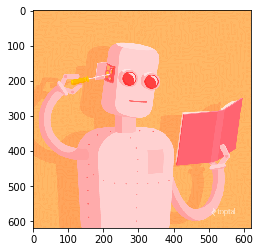

In [22]:
img2 = img.copy() ## Avoid changing the img
img2[:,:,0] = 1 ## Make the "R" channel in RGB all ones
plt.imshow(img2)
plt.show()